In [1]:
####################
## Chapter 3 Code ##
####################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading data
marketing_CLV = pd.read_csv('Marketing_Customer_Value_Analysis.csv')
marketing_CLV.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
## Quick exploration of Response
marketing_CLV['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [3]:
## Here we create Engaged from Response
marketing_CLV['Engaged'] = np.where(marketing_CLV['Response'] == 'No', 0, 1)
marketing_CLV['Engaged'].value_counts()

0    7826
1    1308
Name: Engaged, dtype: int64

In [4]:
## Calculating engagement rate
marketing_CLV.groupby('Engaged').count()['Response'] / marketing_CLV.shape[0]

Engaged
0    0.856799
1    0.143201
Name: Response, dtype: float64

In [5]:
## Sales by channels
sales_by_channel = pd.pivot_table(marketing_CLV, values = 'Response', index = 'Sales Channel', columns = 'Engaged', aggfunc = len)

## Changing column labels
sales_by_channel.columns = ['Not Engaged', 'Engaged']
sales_by_channel

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


Text(0.5, 0.98, '')

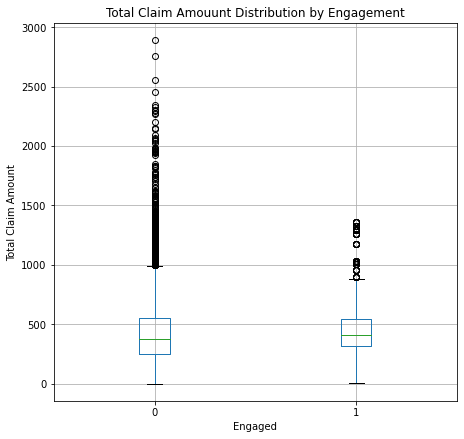

In [6]:
## Total claim amounts by engagement (boxplots)
box_plot = marketing_CLV[['Engaged', 'Total Claim Amount']].boxplot(by = 'Engaged', figsize = (7, 7))

## Changing axes labels and plot title
box_plot.set_xlabel('Engaged')
box_plot.set_ylabel('Total Claim Amount')
box_plot.set_title('Total Claim Amouunt Distribution by Engagement')

plt.suptitle('')

In [7]:
marketing_CLV[['Income', 'Monthly Premium Auto']]

,Income,Monthly Premium Auto
0,56274,69
1,0,94
2,48767,108
3,0,106
4,43836,73
...,...,...
9129,71941,73
9130,21604,79
9131,0,85
9132,21941,96


In [10]:
## Updating variable names
marketing_CLV.columns = ['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
                        'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
                        'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
                        'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
                        'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
                        'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
                        'Vehicle_Class', 'Vehicle_Size', 'Engaged']

## Importing statsmodel
import statsmodels.formula.api as smf

## Builing the logist regression model
logit_md = smf.logit('Engaged ~ Customer_Lifetime_Value + Income + Monthly_Premium_Auto + Months_Since_Last_Claim + Months_Since_Policy_Inception + Number_of_Open_Complaints + Number_of_Policies + Total_Claim_Amount', data = marketing_CLV)

## Extracting model results
result = logit_md.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.409905
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9125
Method:                           MLE   Df Model:                            8
Date:                Mon, 05 Sep 2022   Pseudo R-squ.:                0.002015
Time:                        13:43:48   Log-Likelihood:                -3744.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                   0.05685
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.7866      0.123    -14.476      0.000      -2.029      -1.545
Customer_Lifetime_Value       -6.327e-06   4.86e-06     -1.301      0.193   -1.59e-05     3.2e-06
Income                         2.042e-06   1.09e-06      1.869      0.062   -9.89e-08    4.18e-06
Monthly_Premium_Auto             -0.0001      0.001     -0.097      0.922      -0.003       0.002
Months_Since_Last_Claim          -0.0045      0.003     -1.503      0.133      -0.010       0.001
Months_Since_Policy_Inception     0.0002      0.001      0.198      0.843      -0.002       0.002
Number_of_Open_Complaints        -0.0326      0.034     -0.964      0.335      -0.099       0.034
Number_of_Policies               -0.0244      0.013     -1.904      0.057      -0.050       0.001
Total_Claim_Amount                0.0003      0.000      1.895      0.058   -9.52e-06       0.001
=================================================================================================
"""

In [11]:
marketing_CLV['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [13]:
## Builing the logist regression model
logit_md = smf.logit('Engaged ~ C(Gender) + C(Education)', data = marketing_CLV)

## Extracting model results
result = logit_md.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.410131
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9128
Method:                           MLE   Df Model:                            5
Date:                Mon, 05 Sep 2022   Pseudo R-squ.:                0.001465
Time:                        13:52:25   Log-Likelihood:                -3746.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                   0.05155
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.8480      0.063    -29.537      0.000      -1.971      -1.725
C(Gender)[T.M]                           0.0253      0.060      0.424      0.672      -0.092       0.143
C(Education)[T.College]                  0.1178      0.077      1.526      0.127      -0.033       0.269
C(Education)[T.Doctor]                   0.2876      0.153      1.885      0.059      -0.011       0.587
C(Education)[T.High School or Below]    -0.0617      0.080     -0.770      0.441      -0.219       0.095
C(Education)[T.Master]                   0.1922      0.114      1.685      0.092      -0.031       0.416
========================================================================================================
"""

In [16]:
## Builing the logist regression model
logit_md = smf.logit('Engaged ~ Customer_Lifetime_Value + Income + Monthly_Premium_Auto + Months_Since_Last_Claim + Months_Since_Policy_Inception + Number_of_Open_Complaints + Number_of_Policies + Total_Claim_Amount + C(Gender) + C(Education)', data = marketing_CLV)

## Extracting model results
result = logit_md.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.409215
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9120
Method:                           MLE   Df Model:                           13
Date:                Mon, 05 Sep 2022   Pseudo R-squ.:                0.003694
Time:                        14:01:41   Log-Likelihood:                -3737.8
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                  0.009909
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.8374      0.134    -13.693      0.000      -2.100      -1.574
C(Gender)[T.M]                           0.0154      0.060      0.255      0.798      -0.103       0.133
C(Education)[T.College]                  0.1216      0.077      1.573      0.116      -0.030       0.273
C(Education)[T.Doctor]                   0.3107      0.153      2.028      0.043       0.010       0.611
C(Education)[T.High School or Below]    -0.0746      0.081     -0.925      0.355      -0.232       0.083
C(Education)[T.Master]                   0.2065      0.115      1.798      0.072      -0.019       0.432
Customer_Lifetime_Value              -6.065e-06   4.87e-06     -1.245      0.213   -1.56e-05    3.48e-06
Income                                2.044e-06   1.09e-06      1.867      0.062   -1.01e-07    4.19e-06
Monthly_Premium_Auto                    -0.0005      0.001     -0.374      0.709      -0.003       0.002
Months_Since_Last_Claim                 -0.0047      0.003     -1.576      0.115      -0.011       0.001
Months_Since_Policy_Inception            0.0002      0.001      0.173      0.863      -0.002       0.002
Number_of_Open_Complaints               -0.0345      0.034     -1.021      0.307      -0.101       0.032
Number_of_Policies                      -0.0239      0.013     -1.862      0.063      -0.049       0.001
Total_Claim_Amount                       0.0003      0.000      2.335      0.020    5.57e-05       0.001
========================================================================================================
"""